# Определение перспективного тарифа для телеком-компании

Я аналитик компании федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Предстоит:**
* Сделать предварительный анализ тарифов на небольшой выборке клиентов.
* Проанализировать пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
* Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


**Описание тарифов**

**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
  * минута разговора: 3 рубля
  * сообщение: 3 рубля
  * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
  * минута разговора: 1 рубль
  * сообщение: 1 рубль
  * 1 Гб интернет-трафика: 150 рублей
  
**Примечание**
* Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. 
* Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 
* Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

##  Откроем файлы и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

data_calls = pd.read_csv('/file.csv')
data_internet = pd.read_csv('/file2.csv', index_col=0)
data_msg = pd.read_csv('/file3.csv')
data_tarif = pd.read_csv('/file4.csv')
data_usr = pd.read_csv('/file5.csv')

 Таблица звонков

In [2]:
display(data_calls.head())
data_calls.info()
data_calls.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Таблица интернет-трафика

In [3]:
display(data_internet.head())
data_internet.info()
data_internet.describe()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Таблица с информацией по сообщениям

In [4]:
display(data_msg.head())
data_msg.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица описания тарифов

In [5]:
display(data_tarif.head())
data_tarif.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица с информацией о пользователях

In [6]:
display(data_usr.head())
data_usr.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Все таблицы без пропусков, включаяя колонку churn_date, где NaN означает, что тариф еще действует.

## Подготовим данные и приведем к нужным типам

### Приведем даты к правильному типу

In [7]:
data_calls['duration'] = np.ceil(data_calls['duration'])

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])

data_msg['message_date'] = pd.to_datetime(data_msg['message_date'])

data_usr['churn_date'] = pd.to_datetime(data_usr['churn_date'])

data_usr['reg_date'] = pd.to_datetime(data_usr['reg_date'])

In [8]:
# Проверим действительно ли все сессии были в 2018 году:
print(data_calls['call_date'].dt.year.value_counts())
print(data_internet['session_date'].dt.year.value_counts())
print(data_msg['message_date'].dt.year.value_counts())

2018    202607
Name: call_date, dtype: int64
2018    149396
Name: session_date, dtype: int64
2018    123036
Name: message_date, dtype: int64


In [9]:
# Группируем и объединяем данные в одну таблицу
data_calls['month'] = data_calls['call_date'].dt.month
data_calls = data_calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()

data_internet['month'] = data_internet['session_date'].dt.month
data_internet = data_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

data_msg['month'] = data_msg['message_date'].dt.month
data_msg = data_msg.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
data_msg = data_msg.rename(columns={'id': 'mess_count'}) # переименуем столбец в количество сообщений

report = data_calls.merge(data_internet, on = ['user_id', 'month'], how = 'outer')
report = report.merge(data_msg, on = ['user_id', 'month'], how = 'outer')
data = report.merge(data_usr, on = ['user_id'], how = 'outer')

display(data)
data.info()

,user_id,month,duration,mb_used,mess_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,14568.91,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,19559.44,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,17491.56,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,17322.51,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3216 non-null   int64         
 1   month       3214 non-null   float64       
 2   duration    3174 non-null   float64       
 3   mb_used     3203 non-null   float64       
 4   mess_count  2717 non-null   float64       
 5   age         3216 non-null   int64         
 6   churn_date  189 non-null    datetime64[ns]
 7   city        3216 non-null   object        
 8   first_name  3216 non-null   object        
 9   last_name   3216 non-null   object        
 10  reg_date    3216 non-null   datetime64[ns]
 11  tariff      3216 non-null   object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 326.6+ KB


In [10]:
# Удалим из столбца 'month' две строчки с пустыми значениями тк по ним никаких данных нет
data = data[data['month'].notna()]

# Пустые занчения столбцов duration, mb_used, mess_count заменим на 0
data['duration'] = data['duration'].fillna(0)
data['mb_used'] = data['mb_used'].fillna(0)
data['mess_count'] = data['mess_count'].fillna(0)

# Приведем к правильному типу колонки month, mess_count
data['month'] = data['month'].astype(int)
data['mess_count'] = data['mess_count'].astype(int)
display(data)
data.info()

,user_id,month,duration,mb_used,mess_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,2253.49,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,23233.77,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,14003.64,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,14055.93,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,14568.91,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,11050.56,17,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,0.0,17206.30,32,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,0.0,19559.44,21,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,0.0,17491.56,20,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3214 non-null   int64         
 1   month       3214 non-null   int64         
 2   duration    3214 non-null   float64       
 3   mb_used     3214 non-null   float64       
 4   mess_count  3214 non-null   int64         
 5   age         3214 non-null   int64         
 6   churn_date  187 non-null    datetime64[ns]
 7   city        3214 non-null   object        
 8   first_name  3214 non-null   object        
 9   last_name   3214 non-null   object        
 10  reg_date    3214 non-null   datetime64[ns]
 11  tariff      3214 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 326.4+ KB


In [11]:
# И накоенц обьединим с последней таблицей и получим наш полный датафрейм
data_tarif = data_tarif.rename(columns={'tariff_name': 'tariff'}) # переименуем столбец
data = data.merge(data_tarif, on = ['tariff'], how = 'outer')
display(data)
data.info()

,user_id,month,duration,mb_used,mess_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,2253.49,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,23233.77,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,14003.64,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,14055.93,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,14568.91,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,11050.56,17,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,0.0,17206.30,32,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,0.0,19559.44,21,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,0.0,17491.56,20,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   duration               3214 non-null   float64       
 3   mb_used                3214 non-null   float64       
 4   mess_count             3214 non-null   int64         
 5   age                    3214 non-null   int64         
 6   churn_date             187 non-null    datetime64[ns]
 7   city                   3214 non-null   object        
 8   first_name             3214 non-null   object        
 9   last_name              3214 non-null   object        
 10  reg_date               3214 non-null   datetime64[ns]
 11  tariff                 3214 non-null   object        
 12  messages_included      3214 non-null   int64         
 13  mb_

In [12]:
# ТК в описаниии написано что минуты округляются в большую сторону, то приведем эту клолонку к правильному виду

data['duration'] = data['duration'].astype(int)

# ТК в описаниии написано что расчет нужно производить в гигабайтах и 
# округляются в большую сторону, то приведем эту клолонку к правильному виду
data['gb_used'] = data['mb_used']/1024
data['gb_used'] = np.ceil(data['gb_used']).astype(int)
data['gb_per_month_included'] = data['mb_per_month_included']/1024
data['gb_per_month_included'] = data['gb_per_month_included'].astype(int)

# убираем перерасходы
data['duration_over'] = (data['duration'] - data['minutes_included']) * data['rub_per_minute']
data['gb_used_over'] = (data['gb_used'] - data['gb_per_month_included']) * data['rub_per_gb']
data['mess_count_over'] = (data['mess_count'] - data['messages_included']) * data['rub_per_message']

# убираем отрицательные перерасходы
data['duration_over'] = data['duration_over'].clip(lower = 0)
data['gb_used_over'] = data['gb_used_over'].clip(lower = 0)
data['mess_count_over'] = data['mess_count_over'].clip(lower = 0)

# считаем выручку
data['revenue'] = data['duration_over'] + data['gb_used_over'] + data['mess_count_over'] + data['rub_monthly_fee']
display(data)

,user_id,month,duration,mb_used,mess_count,age,churn_date,city,first_name,last_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,duration_over,gb_used_over,mess_count_over,revenue
0,1000,5,159,2253.49,22,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,3,30,0,0,0,1950
1,1000,6,172,23233.77,60,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,23,30,0,0,0,1950
2,1000,7,340,14003.64,75,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,14,30,0,0,0,1950
3,1000,8,408,14055.93,81,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,14,30,0,0,0,1950
4,1000,9,466,14568.91,57,52,NaT,Краснодар,Рафаил,Верещагин,...,1950,150,1,1,15,30,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,11050.56,17,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,11,15,0,0,0,550
3210,1489,9,0,17206.30,32,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,17,15,0,400,0,950
3211,1489,10,0,19559.44,21,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,20,15,0,1000,0,1550
3212,1489,11,0,17491.56,20,35,NaT,Санкт-Петербург,Павел,Гончаров,...,550,200,3,3,18,15,0,600,0,1150


### Анализ данных

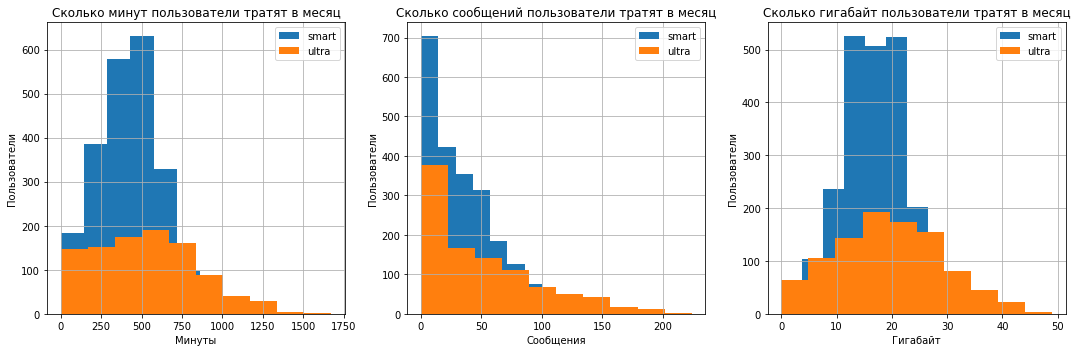

In [13]:
# Построим гистограммы по каждой из интересующих колонок в разрезе тарифов

fig, axes = plt.subplots(1,3, figsize=(15,5))

data[data['tariff'] == 'smart']['duration'].plot(kind ='hist', legend= True, label= "smart",title= 'Сколько минут пользователи тратят в месяц', grid= True, ax=axes[0])
data[data['tariff'] == 'ultra']['duration'].plot(kind ='hist', legend= True, label= "ultra", grid= True, ax=axes[0])
axes[0].set_xlabel("Минуты")
axes[0].set_ylabel("Пользователи")

#Построим гистограмму "Сколько сообщений пользователи тратят в месяц"
data[data['tariff'] == 'smart']['mess_count'].plot(kind ='hist', legend= True, label= "smart", title= 'Сколько сообщений пользователи тратят в месяц', grid= True, ax=axes[1])
data[data['tariff'] == 'ultra']['mess_count'].plot(kind ='hist', legend= True, label= "ultra", grid= True, ax=axes[1])
axes[1].set_xlabel("Сообщения")
axes[1].set_ylabel("Пользователи")

# Построим гистограмму "Сколько гигабайт пользователи тратят в месяц"
data[data['tariff'] == 'smart']['gb_used'].plot(kind ='hist', legend= True, label= "smart", title= 'Сколько гигабайт пользователи тратят в месяц', grid= True, ax=axes[2])
data[data['tariff'] == 'ultra']['gb_used'].plot(kind ='hist', legend= True, label= "ultra", grid= True, ax=axes[2])
axes[2].set_xlabel("Гигабайт")
axes[2].set_ylabel("Пользователи")

plt.tight_layout()
plt.show()

In [14]:
# Посчитаем среднее количество, дисперсию и стандартное отклонение
dur = data.groupby('tariff').agg({'duration' : ['mean', 'var', 'std']}) 
display("Срднее, дисперссия и стандпртное отклонение минут", dur)

sms = data.groupby('tariff').agg({'mess_count' : ['mean', 'var', 'std']}) 
display("Срднее, дисперссия и стандпртное отклонение смс", sms)

gb = data.groupby('tariff').agg({'gb_used' : ['mean', 'var', 'std']}) 
display("Срднее, дисперссия и стандпртное отклонение Гб", gb)

'Срднее, дисперссия и стандпртное отклонение минут'

duration                           
              mean            var         std
tariff                                       
smart   417.934948   36219.315784  190.313730
ultra   526.623350  100873.633397  317.606098

'Срднее, дисперссия и стандпртное отклонение смс'

mess_count                        
             mean          var        std
tariff                                   
smart   33.384029   796.812958  28.227876
ultra   49.363452  2285.266143  47.804457

'Срднее, дисперссия и стандпртное отклонение Гб'

gb_used                     
             mean        var       std
tariff                                
smart   16.328847  33.028705  5.747061
ultra   19.494416  97.091686  9.853511

### Итоги анализа данных: 
Из гистограмм видно, что у обоих тарифов есть существенный перерасход интернета, смс и минуты укладываются в тарифы.
Из таблиц со срднем, дисперсией и стандартным отклонением видно что разброс данных большой. У тарифа Ультра разброс выше, потому что больше лимиты.

## Проверим гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


### Проверим отличается ли средняя выручка пользователей тарифов «Ультра» и «Смарт» 

In [15]:
# нулевая гипотеза, что средние выручки по двум тарифам равны(у выборок генеральных совокупностей)
# альтернативная гипотеза, что средние выручки не равны
data_ultra = data[data['tariff']  == 'ultra']['revenue']
data_smart = data[data['tariff']  == 'smart']['revenue']

alpha = 0.05 # Общепринятые пороговое значение
results = st.ttest_ind(data_ultra, data_smart,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


p-value очень мало и показывает что средние у генеральных совокупностей не равны

### Проверим как средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [16]:
# нулевая гипотеза, что средняя выручка по Москве равна средней выручки(у генеральных совокупностей)
# альтернативная гипотеза, что средние выручки не равны
data_moscow = data[data['city']  == 'Москва']['revenue']
data_any = data[data['city']  != 'Москва']['revenue']

alpha = 0.05 # Общепринятые пороговое значение
results_2 = st.ttest_ind(data_moscow, data_any, equal_var = False)

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


p-value= 0.28 показывает что средние у генеральных совокупностей будут равны с вероятностью 28 процентов

Использовался критерей "Гипотеза о равенстве средних двух генеральных совокупностей"

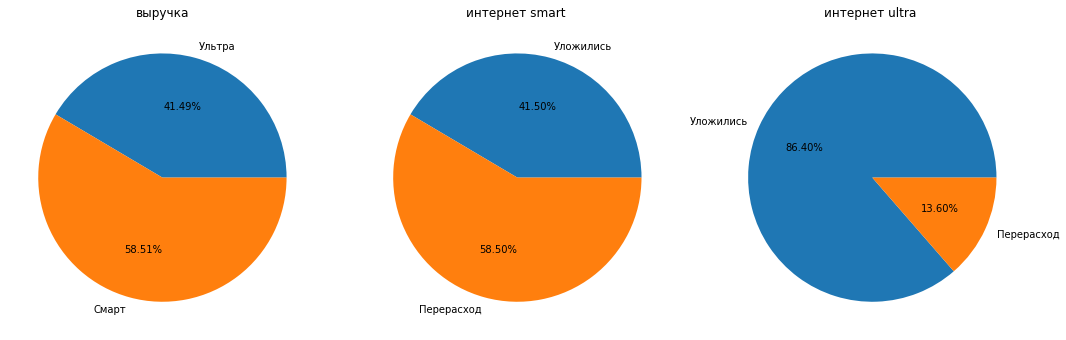

In [17]:
# немного визуализации для Заключения
values = [data[data['tariff']  == 'ultra']['revenue'].sum(),
          data[data['tariff']  == 'smart']['revenue'].sum()]
values1 = [data[(data['tariff'] == "smart") & (data['gb_used_over'] == 0)]['gb_used_over'].count(),
          data[(data['tariff'] == "smart") & (data['gb_used_over'] != 0)]['gb_used_over'].count()]
values2 = [data[(data['tariff'] == "ultra") & (data['gb_used_over'] == 0)]['gb_used_over'].count(),
          data[(data['tariff'] == "ultra") & (data['gb_used_over'] != 0)]['gb_used_over'].count()]
labels = ['Ультра', 'Смарт']
labels1 = ['Уложились', 'Перерасход']

fig1, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
ax1.set_title('выручка')
ax1.pie(values, labels = labels, autopct='%1.2f%%')
ax2.set_title('интернет smart ')
ax2.pie(values1, labels = labels1, autopct='%1.2f%%')
ax3.set_title('интернет ultra ')
ax3.pie(values2, labels = labels1, autopct='%1.2f%%')

plt.tight_layout()
plt.show()


## Заключение:
По моему мнению тариф "Смарт" безперспективен, потому что клиенты часто уходят в перерасход в интернете, а минут и смс обычно хватает. Это может приводить к оттоку.
Нужно менять условия тарифа, ведь этот тариф приносит существенный доход. 
В ультре клиенты в основном укладываются в свой тариф но стоит он существенно дороже.

Проверив гипотезы видно, что средняя выручка этих двух тарифных планов с большой вероятностью будут не равны, хотя один тарифнвй план и дешевле другого.
Проверка гипотезы по регионам показала, что их средняя выручка  с  вероятностью  28% будут  равны.